In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product
import numpy as np
from scipy import stats as scistats
import seawater as sw

import matplotlib.pyplot as plt

import traits_db
import metabolic as mi
import util

## Read traits and examine distributions

In [3]:
df = traits_db.df_mi
df.head()

,Species,Ao,Ac,Eo
0,Acanthephyra acutifrons,26.809651,13.364732,-0.0278
1,Acanthephyra curtirostris,25.575448,14.364194,0.0380
2,Acanthephyra purpurea,23.310023,7.460879,0.1320
3,Acanthephyra smithi,28.985507,17.657939,-0.0301
5,Acipenser brevirostrum,22.123894,4.901716,0.3626


### Plot trait histograms

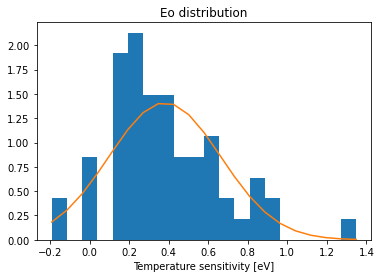

In [4]:
fig, ax = plt.subplots()

beta = scistats.norm.fit(df.Eo.values)

n, bins, h = ax.hist(df.Eo.values, 20, density=True);
pdf_fitted = scistats.norm.pdf(bins, *beta)
ax.plot(bins, pdf_fitted)
ax.set_title('Eo distribution')
ax.set_xlabel(util.attrs_label(df.Eo.attrs));

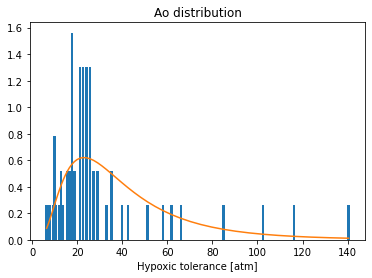

In [5]:
fig, ax = plt.subplots()

beta = scistats.norm.fit(np.log(df.Ao.values))

hist, bin_edges = np.histogram(np.log(df.Ao.values), 50, density=True)
bins = np.vstack((bin_edges[:-1], bin_edges[1:])).mean(axis=0)
ax.bar(np.exp(bins), hist, width=np.exp(np.diff(bin_edges)[0]))

pdf_fitted = scistats.norm.pdf(bins, *beta)
ax.plot(np.exp(bins), pdf_fitted, c='tab:orange')
ax.set_title('Ao distribution')
ax.set_xlabel(util.attrs_label(df.Ao.attrs));

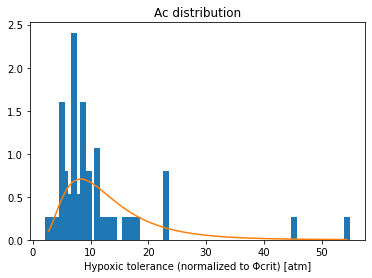

In [6]:
fig, ax = plt.subplots()

beta = scistats.norm.fit(np.log(df.Ac.values))

hist, bin_edges = np.histogram(np.log(df.Ac.values), 50, density=True)
bins = np.vstack((bin_edges[:-1], bin_edges[1:])).mean(axis=0)
ax.bar(np.exp(bins), hist, width=np.exp(np.diff(bin_edges)[0]))

pdf_fitted = scistats.norm.pdf(bins, *beta)
ax.plot(np.exp(bins), pdf_fitted, c='tab:orange')
ax.set_title('Ac distribution')
ax.set_xlabel(util.attrs_label(df.Ac.attrs));

## Demonstrate root finding technique to solve to ATmax

Loop over traits and values of pO$_2$ to find ATmax

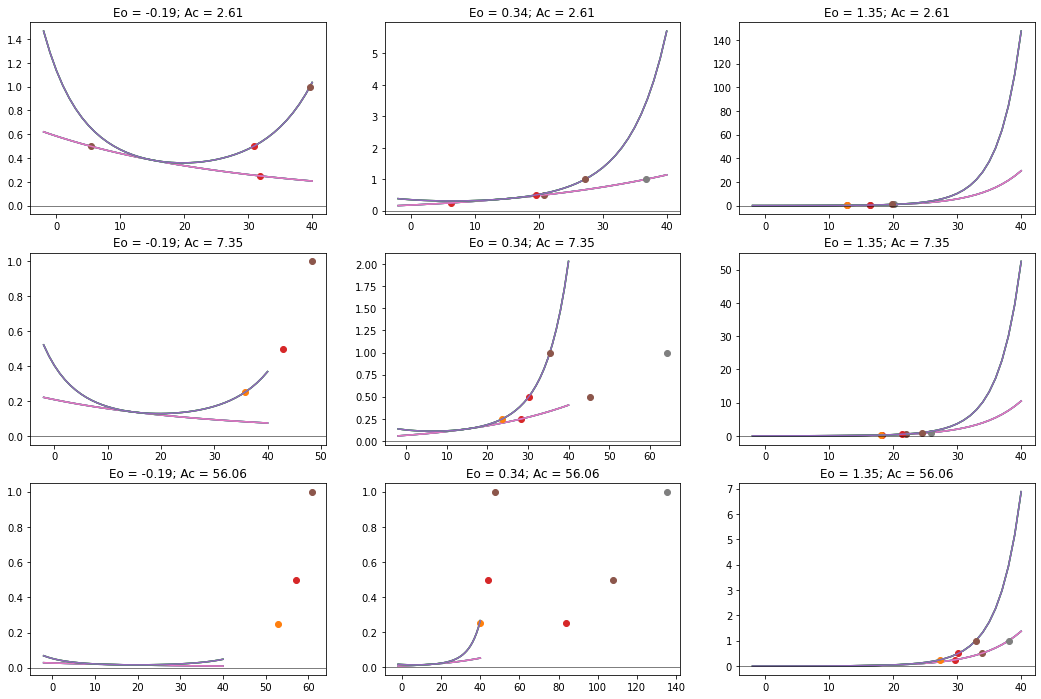

In [7]:
Ac_dist = np.percentile(df.Ac, [0, 50, 100])
Eo_dist = np.percentile(df.Eo, [0, 50, 100])

nrow = len(Ac_dist)
ncol = len(Eo_dist)
figsize = (6, 4)
fig, axs = plt.subplots(
    nrow, ncol, 
    figsize=(figsize[0]*ncol, figsize[1]*nrow),                       
    constrained_layout=False,
    squeeze=False,
)    

T = np.arange(-2., 41., 1.)

for i, j in product(range(nrow), range(ncol)):
    ax = axs[i, j]
    Ac = Ac_dist[i]
    Eo = Eo_dist[j]
    for dEodT in [0., 0.02,]:
        for po2 in [0, 0.25, 0.5, 1.]:
            p = ax.plot(T, mi.pO2_at_Phi_crit(T, Ac, Eo, dEodT))
        
            Tmax_hi = mi.compute_ATmax(po2, Ac, Eo, dEodT=dEodT)
            ax.plot(Tmax_hi, po2, 'o')
    ax.axhline(0., lw=0.5, c='k')        
    ax.set_title(f'Eo = {Eo:0.2f}; Ac = {Ac:0.2f}')